## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], 
              use_BN=True, drp_ratio=0.2, l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        if l1_ratio is not None and l2_ratio is not None:
            x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1),
                               kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        
        if use_BN:
            x = keras.layers.BatchNormalization()(x)
        
        if drp_ratio is not None:
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
def plot_results(results):
    color_bar = ["r", "g", "b", "y", "m", "k"]

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
    plt.title("Loss")
    plt.legend()
    plt.show()

    plt.figure(figsize=(8,6))
    for i, cond in enumerate(results.keys()):
        plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
        plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
    plt.title("Accuracy")
    plt.legend()
    plt.show()

Experiment with use_BN=True, drp=0.2, l1=0.0001, l2=0.0001
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________

50000/50000 [==============================] - 3s 55us/step - loss: 4.7719 - acc: 0.5278 - val_loss: 4.8050 - val_acc: 0.5171
Epoch 41/50
50000/50000 [==============================] - 3s 54us/step - loss: 4.7479 - acc: 0.5327 - val_loss: 4.7792 - val_acc: 0.5193
Epoch 42/50
50000/50000 [==============================] - 3s 54us/step - loss: 4.7257 - acc: 0.5342 - val_loss: 4.7616 - val_acc: 0.5167
Epoch 43/50
50000/50000 [==============================] - 3s 54us/step - loss: 4.7007 - acc: 0.5386 - val_loss: 4.7423 - val_acc: 0.5212
Epoch 44/50
50000/50000 [==============================] - 3s 54us/step - loss: 4.6846 - acc: 0.5363 - val_loss: 4.7129 - val_acc: 0.5305
Epoch 45/50
50000/50000 [==============================] - 3s 53us/step - loss: 4.6533 - acc: 0.5426 - val_loss: 4.6931 - val_acc: 0.5259
Epoch 46/50
50000/50000 [==============================] - 3s 54us/step - loss: 4.6299 - acc: 0.5437 - val_loss: 4.6859 - val_acc: 0.5252
Epoch 47/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 53us/step - loss: 4.1689 - acc: 0.7868 - val_loss: 5.0293 - val_acc: 0.4911
Epoch 39/50
50000/50000 [==============================] - 3s 52us/step - loss: 4.1320 - acc: 0.7949 - val_loss: 5.0465 - val_acc: 0.4803
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 4.0936 - acc: 0.8050 - val_loss: 5.0177 - val_acc: 0.4944
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 4.0590 - acc: 0.8106 - val_loss: 5.0310 - val_acc: 0.4888
Epoch 42/50
50000/50000 [==============================] - 3s 51us/step - loss: 4.0237 - acc: 0.8181 - val_loss: 5.0040 - val_acc: 0.4900
Epoch 43/50
50000/50000 [==============================] - 3s 52us/step - loss: 3.9862 - acc: 0.8280 - val_loss: 5.0004 - val_acc: 0.4940
Epoch 44/50
50000/50000 [==============================] - 3s 52us/step - loss: 3.9551 - acc: 0.8324 - val_loss: 4.9972 - val_acc: 0.4912
Epoch 45/50
50000/50000 [=====================

Epoch 34/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3800 - acc: 0.5066 - val_loss: 1.3824 - val_acc: 0.5095
Epoch 35/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3672 - acc: 0.5116 - val_loss: 1.3725 - val_acc: 0.5127
Epoch 36/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3607 - acc: 0.5144 - val_loss: 1.3721 - val_acc: 0.5086
Epoch 37/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3564 - acc: 0.5153 - val_loss: 1.3650 - val_acc: 0.5146
Epoch 38/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3492 - acc: 0.5164 - val_loss: 1.3690 - val_acc: 0.5148
Epoch 39/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3447 - acc: 0.5196 - val_loss: 1.3622 - val_acc: 0.5159
Epoch 40/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3366 - acc: 0.5222 - val_loss: 1.3616 - val_acc: 0.5145
Epoch 41/50
50000/50000 [=========

50000/50000 [==============================] - 2s 48us/step - loss: 5.2394 - acc: 0.4165 - val_loss: 5.1553 - val_acc: 0.4444
Epoch 33/50
50000/50000 [==============================] - 2s 48us/step - loss: 5.2177 - acc: 0.4181 - val_loss: 5.1337 - val_acc: 0.4440
Epoch 34/50
50000/50000 [==============================] - 2s 48us/step - loss: 5.1933 - acc: 0.4151 - val_loss: 5.1106 - val_acc: 0.4503
Epoch 35/50
50000/50000 [==============================] - 2s 47us/step - loss: 5.1686 - acc: 0.4231 - val_loss: 5.0920 - val_acc: 0.4480
Epoch 36/50
50000/50000 [==============================] - 2s 48us/step - loss: 5.1474 - acc: 0.4233 - val_loss: 5.0659 - val_acc: 0.4516
Epoch 37/50
50000/50000 [==============================] - 2s 48us/step - loss: 5.1240 - acc: 0.4272 - val_loss: 5.0435 - val_acc: 0.4554
Epoch 38/50
50000/50000 [==============================] - 2s 48us/step - loss: 5.1034 - acc: 0.4296 - val_loss: 5.0248 - val_acc: 0.4547
Epoch 39/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 44us/step - loss: 5.0623 - acc: 0.4876 - val_loss: 5.0818 - val_acc: 0.4683
Epoch 34/50
50000/50000 [==============================] - 2s 43us/step - loss: 5.0394 - acc: 0.4887 - val_loss: 5.0607 - val_acc: 0.4702
Epoch 35/50
50000/50000 [==============================] - 2s 44us/step - loss: 5.0156 - acc: 0.4907 - val_loss: 5.0400 - val_acc: 0.4768
Epoch 36/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.9934 - acc: 0.4938 - val_loss: 5.0224 - val_acc: 0.4757
Epoch 37/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.9709 - acc: 0.4952 - val_loss: 4.9999 - val_acc: 0.4738
Epoch 38/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.9487 - acc: 0.4973 - val_loss: 4.9801 - val_acc: 0.4775
Epoch 39/50
50000/50000 [==============================] - 2s 43us/step - loss: 4.9260 - acc: 0.4984 - val_loss: 4.9550 - val_acc: 0.4787
Epoch 40/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 44us/step - loss: 1.6641 - acc: 0.4076 - val_loss: 1.5856 - val_acc: 0.4386
Epoch 32/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6575 - acc: 0.4096 - val_loss: 1.5818 - val_acc: 0.4413
Epoch 33/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6504 - acc: 0.4135 - val_loss: 1.5736 - val_acc: 0.4438
Epoch 34/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6428 - acc: 0.4166 - val_loss: 1.5678 - val_acc: 0.4438
Epoch 35/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6335 - acc: 0.4184 - val_loss: 1.5617 - val_acc: 0.4472
Epoch 36/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6274 - acc: 0.4198 - val_loss: 1.5563 - val_acc: 0.4503
Epoch 37/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6229 - acc: 0.4208 - val_loss: 1.5519 - val_acc: 0.4476
Epoch 38/50
50000/50000 [=====================

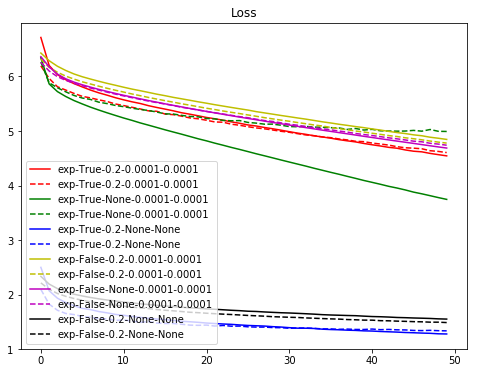

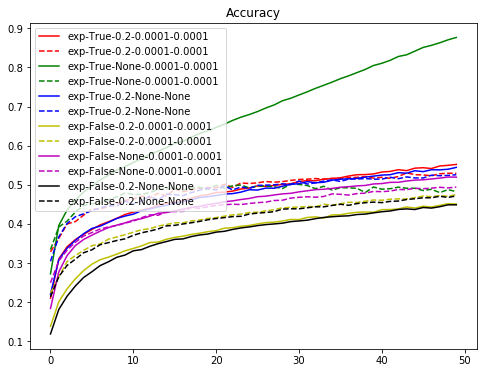

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

PARAMS = [(True, 0.2, 1e-4, 1e-4),
          (True, None, 1e-4, 1e-4),
          (True, 0.2, None, None),
          (False, 0.2, 1e-4, 1e-4),
          (False, None, 1e-4, 1e-4),
          (False, 0.2, None, None),
         ]

results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for use_BN, drp, l1, l2 in PARAMS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with use_BN=%s, drp=%s, l1=%s, l2=%s" % (str(use_BN), str(drp), str(l1), str(l2)))
    model = build_mlp(input_shape=x_train.shape[1:], use_BN=use_BN, drp_ratio=drp, l1_ratio=l1, l2_ratio=l2)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-%s-%s-%s-%s" % (str(use_BN), str(drp), str(l1), str(l2))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
plot_results(results)